In [1]:
import io
import os
import pickle
import tarfile
from tkinter import N
import urllib

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression
import torch
import torchvision.transforms.functional as TF
from tqdm import tqdm

if not os.path.exists('data'):
    new_directory_path = "..\\..\\"
    os.chdir(new_directory_path)

from src.training.pipeline_builder  import PipelineBuilder

DINO_REPO_PATH = "C:\\Users\\ulloa\\OneDrive\\Desktop\\Practicas\\projectes\\dinov3"

In [2]:
# examples of available DINOv3 models:
MODEL_DINOV3_VITS = "dinov3_vits16"
MODEL_DINOV3_VITSP = "dinov3_vits16plus"
MODEL_DINOV3_VITB = "dinov3_vitb16"
MODEL_DINOV3_VITL = "dinov3_vitl16"
MODEL_DINOV3_VITHP = "dinov3_vith16plus"
MODEL_DINOV3_VIT7B = "dinov3_vit7b16"

MODEL_NAME = MODEL_DINOV3_VITL

path = "C:\\Users\\ulloa\\.cache\\torch\\hub\\checkpoints\\dinov3_vits16_weights.pth"
name = "dinov3_vits16_weights.pth"
model = torch.hub.load(DINO_REPO_PATH, 'dinov3_vits16', source='local', weights=name)
t = PipelineBuilder.make_transform(840)
# model.cuda()

In [3]:
img_path = "data\\Coco FreeView\\COCOSearch18-images-TA\\bottle\\000000000196.jpg"
img = Image.open(img_path)
ori_img = img.convert("RGB")
resized_img = t(ori_img)
resized_img = resized_img.unsqueeze(0)
with torch.inference_mode():
    feats, cls_token = model.get_intermediate_layers(resized_img, n=1, reshape=True, norm=True, return_class_token=True)[0]

torch.Size([384, 2704])
torch.Size([384])


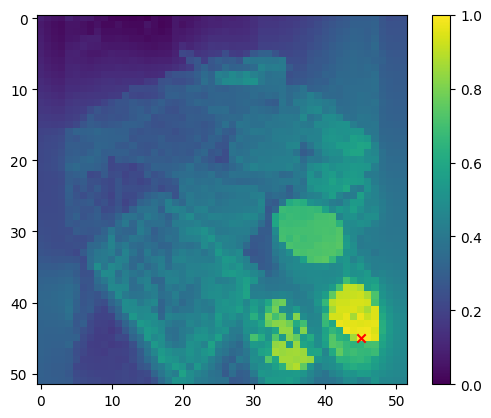

In [63]:
def plot_similarity(feats, coords):
    # it will take the feature in the coord, compute cosine similarity and plot the similarity matrix
    # feats with shape (B,F,H,W)
    feats = feats.squeeze(0)
    F,H,W = feats.shape
    feat = feats[:,coords[0], coords[1]]
    # flatten dimension 1 and 2
    feats = feats.flatten(start_dim=1, end_dim=2)
    print(feats.shape)
    print(feat.shape)
    sim = torch.nn.functional.cosine_similarity(feat.unsqueeze(1),feats , dim=0)
    # recover shape
    
    sim = sim.view(H,W)
    plt.imshow(sim.cpu().numpy())
    plt.scatter(coords[1], coords[0], color='red', marker='x')
    plt.colorbar()
    plt.show()
plot_similarity(feats, (45, 45))


In [64]:
# save the features and the token in the same file
torch.save({"feats": feats, "cls_token": cls_token}, "feats_and_token.pt")

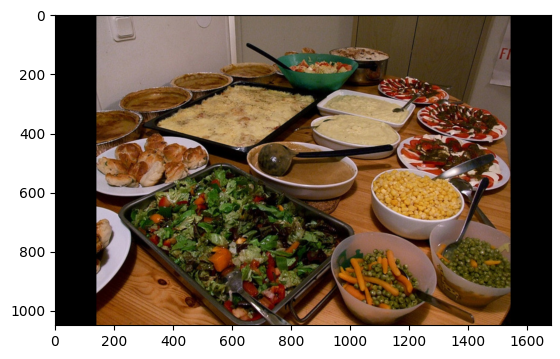

In [60]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()